# Assignment 2

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)

In [5]:
data['0'].value_counts().sort_index()

0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: 0, dtype: int64

In [6]:
data.isnull().sum().any()

False

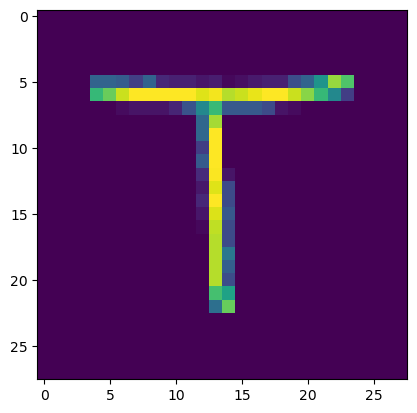

In [7]:
plt.imshow(data.sample().drop(columns=['0']).to_numpy().reshape((28, 28)))

In [8]:
X = data.drop(columns=['0'])
y = data['0']

In [9]:
del data

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train = X_train.reshape((y_train.shape[0], 28, 28))
X_test = X_test.reshape((y_test.shape[0], 28, 28))

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = np.eye(26)[y_train]
y_test = np.eye(26)[y_test]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((297960, 28, 28, 1), (74490, 28, 28, 1), (297960, 26), (74490, 26))

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=(1, 1), padding="valid", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, strides=(1, 1), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=5, strides=(1, 1), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=5, strides=(1, 1), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                        

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
callback = tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=3, verbose=1)

In [17]:
model.fit(X_train, y_train, validation_split=0.2, epochs=20, callbacks=[callback])

Epoch 1/20


2023-08-24 16:50:50.667090: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


7449/7449 [==============================] - 126s 15ms/step - loss: 1.9769 - accuracy: 0.4785 - val_loss: 0.4875 - val_accuracy: 0.9046
Epoch 2/20
7449/7449 [==============================] - 110s 15ms/step - loss: 0.9588 - accuracy: 0.7195 - val_loss: 0.2690 - val_accuracy: 0.9424
Epoch 3/20
7449/7449 [==============================] - 108s 14ms/step - loss: 0.6783 - accuracy: 0.7988 - val_loss: 0.1460 - val_accuracy: 0.9649
Epoch 4/20
7449/7449 [==============================] - 108s 15ms/step - loss: 0.5282 - accuracy: 0.8430 - val_loss: 0.1289 - val_accuracy: 0.9688
Epoch 5/20
7449/7449 [==============================] - 110s 15ms/step - loss: 0.4410 - accuracy: 0.8677 - val_loss: 0.0922 - val_accuracy: 0.9774
Epoch 6/20
7449/7449 [==============================] - 110s 15ms/step - loss: 0.3755 - accuracy: 0.8872 - val_loss: 0.0854 - val_accuracy: 0.9793
Epoch 7/20
7449/7449 [==============================] - 110s 15ms/step - loss: 0.3331 - accuracy: 0.8996 - val_loss: 0.0765 - val

In [18]:
model.save("model.h5")

In [4]:
model = tf.keras.models.load_model("./model.h5")

In [19]:
y_pred = model.predict(X_test)

2328/2328 [==============================] - 8s 3ms/step


In [23]:
predictions = np.argmax(y_pred, axis=1)

In [ ]:
predictions = np.eye(26)[predictions]

In [36]:
diff = y_test - y_pred
diff

array([[-4.33509756e-11, -6.68272548e-10, -4.76785209e-11, ...,
        -2.57605604e-10, -3.73973491e-10, -1.42611156e-09],
       [-1.05627018e-09, -4.57697311e-08, -4.27328839e-10, ...,
        -1.33436015e-06, -1.24016921e-08, -1.70370218e-09],
       [-6.60345834e-10, -6.27864516e-09, -6.52100809e-08, ...,
        -6.53377885e-09, -5.38916733e-09, -3.47194010e-11],
       ...,
       [-6.20237038e-15, -2.47522187e-14, -4.97613652e-11, ...,
        -9.21151905e-11, -1.65031411e-09, -8.13530310e-09],
       [-6.02462958e-12, -6.18925089e-09, -3.04957752e-12, ...,
        -1.30080522e-07, -2.33040309e-10, -1.60982842e-11],
       [-3.23204241e-16, -4.36352018e-13, -1.29438323e-14, ...,
        -2.27278482e-13, -7.40733294e-14, -1.15702131e-12]])

In [37]:
model.evaluate(X_test, y_test)

2328/2328 [==============================] - 11s 5ms/step - loss: 0.0499 - accuracy: 0.9887


[0.04987518489360809, 0.9887367486953735]

In [5]:
import cv2

In [36]:
image = cv2.imread("./M_IMG.jpeg")
image.shape

(502, 506, 3)

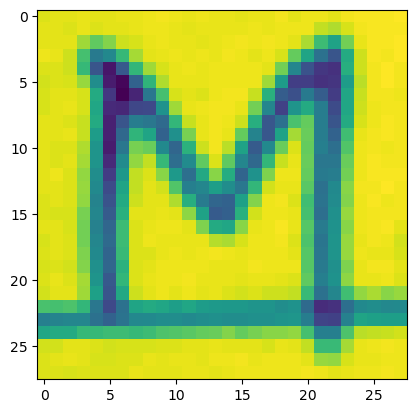

In [37]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
plt.imshow(image)
image = np.expand_dims(image, -1)
image = np.expand_dims(image, 0)

In [32]:
image.shape

(1, 28, 28, 1)

In [33]:
pred = model.predict(image)

1/1 [==============================] - 0s 32ms/step


In [34]:
np.argmax(pred, axis=1)

array([9], dtype=int64)